In [1]:
# Preliminaries to work with the data.   
%matplotlib inline
%run __init__.py
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas

## Load and rank the predictions for the test data

In [2]:
# Load the correlations.  These were generated by Pablo.  
corrs = pandas.read_table('../../data/Corr.txt',header=None)
corrs = corrs.as_matrix()

In [3]:
# Rank the correlations from best to worst for each molecule
corrs_rank = corrs.copy()
for i in range(69):
    sorted_corrs = sorted(corrs[:,i],reverse=True)
    for j in range(69):
        corrs_rank[j,i] = 1+sorted_corrs.index(corrs[j,i])

## Fig. 6E

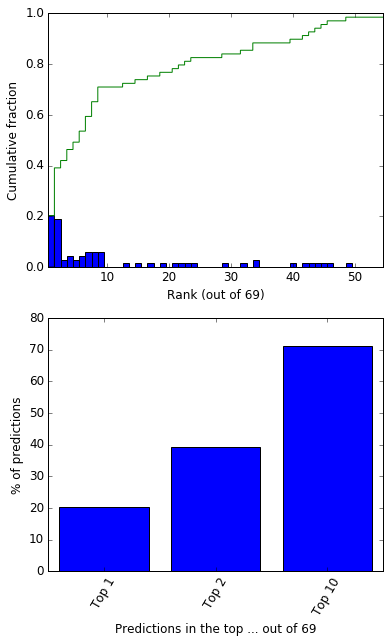

In [5]:
mpl.rcParams.update({'font.size':12})
fig,ax = plt.subplots(2,1,figsize=(6,10))

# Plot the histogram and cumulative histogram of the diagonal (self-prediction) ranks
ax[0].hist(corrs_rank.diagonal(),normed=True,bins=np.arange(0.5,69.5,1));
cumul = ax[0].hist(corrs_rank.diagonal(),cumulative=True,normed=True,bins=np.arange(0.5,69.5,1),histtype='step')[0];
ax[0].set_xlabel('Rank (out of 69)')
ax[0].set_ylabel('Cumulative fraction')
ax[0].set_xlim(0.5,54.5)

# Plot a summary bar graph of the ranks
fract_below = [100*cumul[x] for x in [0,1,9]]
cutoffs = np.arange(3)
ax[1].bar(cutoffs,fract_below,align='center')
ax[1].set_xticks(cutoffs)
ax[1].set_xticklabels(['Top 1','Top 2','Top 10'],rotation=60)
ax[1].set_xlabel('Predictions in the top ... out of 69')
ax[1].set_ylabel('% of predictions')

plt.savefig('../../figures/prediction-ranks.eps')